**Name: Pearlynne Chong** <br>
**Date: May 28, 2021** <br>
**Day 11 Coding Challenge**

# Data cleaning and operationalization

I'm going to introduce a dataset of vehicle crashes in Indiana, show how to import it into pandas, and give examples of a few ways of exploring this data.

**Download the data from [here](https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/aries_crash_data_2018_filtered.csv?raw=true)**. I created this CSV file from [this full dataset](https://hub.mph.in.gov/dataset/aries-crash-data-2007-2017/resource/cc90589c-72d8-4d92-a5fe-73254b555c73) by filtering out many of the columns to make it small enough to easily fit in memory.

A description of the columns is [here](https://hub.mph.in.gov/dataset/aries-crash-data-2007-2017/resource/f61a5dcb-5ca3-485a-9ecf-cd3d8740dc9b?inner_span=True).

Then, I want you to form groups of 2-4 where you identify a hypothesis about this data, brainstorm a visualization or set of visualizations that would give you insight into your hypothesis, and then try to create that visualization in Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This code downloads the CSV every time it's run.
# Instead, you may want to download the CSV to your computer, and load it from there
# You can use the same code, just change the path to where you download it
raw_df = pd.read_csv('https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/aries_crash_data_2018_filtered.csv?raw=true')

## Understanding and Cleaning the data

I always start by looking at the data to make sure things look reasonable and to figure out what we are looking at.

## raw_df

It looks like Gender and age and drug test results are all NA for the first few rows. Let's check how often they were recorded.

In [7]:
raw_df.isna().sum()

INDIVIDUAL_MR_RECORD         0
PERSONTYPEDESCR          15406
GENDERCDE               399734
AGE_GRP                 398761
INJNATUREDESCR          703796
RESULTDRUGIND           750311
COLLDTE                      0
COLLISION_TIME               0
COLLISION_TIME_AM_PM        10
CITYDESCR                  757
INJUREDNMB                 615
DEADNMB                    404
WEATHERDESCR              1070
PRIMARYFACTORDESCR        2864
dtype: int64

In [8]:
# This is the total number of rows
len(raw_df)

752370

So, it looks like the drug test column "RESULTDRUGIND" is going to be pretty useless. It's almost never recorded.

It looks like age and gender are only recorded about half the time. Let's look a little closer into the data and see if we can figure out what's going on.

It's still not totally clear what this data represents. From the description, we can see that the Individual MR Record refers to each incident, so let's so how many of them there are:

In [9]:
len(raw_df.INDIVIDUAL_MR_RECORD.unique())

216968

Far fewer than the total rows. Let's sort by that, and see if we can figure out more.

In [10]:
raw_df.sort_values("INDIVIDUAL_MR_RECORD")

,INDIVIDUAL_MR_RECORD,PERSONTYPEDESCR,GENDERCDE,AGE_GRP,INJNATUREDESCR,RESULTDRUGIND,COLLDTE,COLLISION_TIME,COLLISION_TIME_AM_PM,CITYDESCR,INJUREDNMB,DEADNMB,WEATHERDESCR,PRIMARYFACTORDESCR
577508,903070479,Driver,F,45-54 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
533542,903070479,Injured,M,15-24 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
237545,903070479,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
534723,903070479,Driver,M,25-34 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
240277,903070479,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630468,903384692,Driver,M,55-64 Years,NaN,NaN,2018-12-31,05:57,PM,Monon,0.0,0.0,Snow,IMPROPER PASSING
742948,903395728,Driver,M,25-34 Years,Contusion/Bruise,NaN,2018-12-25,05:46,PM,Tell City,1.0,0.0,Cloudy,RAN OFF ROAD
223505,903395728,Owner Vehicle,NaN,NaN,NaN,NaN,2018-12-25,05:46,PM,Tell City,1.0,0.0,Cloudy,RAN OFF ROAD
564332,903401646,Driver,M,55-64 Years,NaN,NaN,2018-12-26,02:08,PM,Clinton (Vermillion County),0.0,0.0,Clear,DISREGARD SIGNAL/REG SIGN


Let's look at just one incident; it looks like the drivers, any injured passengers, and the owners are all listed (although no information is given about owners).

In [11]:
raw_df.loc[raw_df.INDIVIDUAL_MR_RECORD == 903070479,]

,INDIVIDUAL_MR_RECORD,PERSONTYPEDESCR,GENDERCDE,AGE_GRP,INJNATUREDESCR,RESULTDRUGIND,COLLDTE,COLLISION_TIME,COLLISION_TIME_AM_PM,CITYDESCR,INJUREDNMB,DEADNMB,WEATHERDESCR,PRIMARYFACTORDESCR
237545,903070479,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
240277,903070479,Owner Vehicle,NaN,NaN,NaN,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
533542,903070479,Injured,M,15-24 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
534723,903070479,Driver,M,25-34 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN
577508,903070479,Driver,F,45-54 Years,Complaint of Pain,NaN,2018-01-01,12:03,AM,Fort Wayne,3.0,0.0,Cloudy,DISREGARD SIGNAL/REG SIGN


Let's see if this is true more broadly. It seems like the "Owner Vehicle" rows just aren't going to be much use to us at all. Let's try to get a sense of how common they are, and if they really never contain information

In [12]:
len(raw_df[raw_df.PERSONTYPEDESCR == 'Owner Vehicle'])

370651

In [13]:
raw_df[raw_df.PERSONTYPEDESCR == 'Owner Vehicle'].isna().sum()

INDIVIDUAL_MR_RECORD         0
PERSONTYPEDESCR              0
GENDERCDE               370365
AGE_GRP                 370357
INJNATUREDESCR          370644
RESULTDRUGIND           370651
COLLDTE                      0
COLLISION_TIME               0
COLLISION_TIME_AM_PM         3
CITYDESCR                  360
INJUREDNMB                 279
DEADNMB                    172
WEATHERDESCR               496
PRIMARYFACTORDESCR        1315
dtype: int64

Looks like for the data we have here, the "Owner Vehicle" entries aren't giving us any extra information, so let's just remove them.

In [14]:
raw_df = raw_df[raw_df.PERSONTYPEDESCR != 'Owner Vehicle']

## Creating measures from raw data

It is very common that the raw data isn't in the form that you need it. You need to figure out how to transform it into something usable for the statistics and/or visualizations that you want to produce.

In this case, I'm going to take the goal of understanding collisions. Each row of the data represents a person, not a collision, so if we visualized or analyzed the raw data, we could be misled, as collisions with more people would receive more weight.

So, what we need to do is to build a dataset of accidents, with datetime, weather, number injured, and number killed.

My suspicion, based on what I've seen so far, is that all of these are the same across each of the rows for a given collision. It is worth testing that assumption, though.

In [15]:
grouped = raw_df.sort_values(['COLLDTE', 'COLLISION_TIME']).groupby("INDIVIDUAL_MR_RECORD")

# For example, this is a simple test of the number of unique weather descriptions per group.
sum(grouped.WEATHERDESCR.nunique() > 1)

0

In [16]:
# We see the same for number injured and number killed
print(sum(grouped.INJUREDNMB.nunique() > 1))
print(sum(grouped.DEADNMB.nunique() > 1))

0
0


So, we can move forward with the assumption that just getting the first value is good enough for summarizing the accident.

In [17]:
# Get the first entry for each of these
coll_df = pd.DataFrame({"date" : grouped.COLLDTE.first(),
                        "time": grouped.COLLISION_TIME.first() + grouped.COLLISION_TIME_AM_PM.first(), 
                        "injured": grouped.INJUREDNMB.first(),
                        "deceased": grouped.DEADNMB.first(),
                        "weather": grouped.WEATHERDESCR.first(),
                        "accident_count": 1
                       })

coll_df

,date,time,injured,deceased,weather,accident_count
INDIVIDUAL_MR_RECORD,,,,,,
903070479,2018-01-01,12:03AM,3.0,0.0,Cloudy,1
903070487,2018-01-01,12:48AM,0.0,0.0,Snow,1
903070491,2018-01-01,12:57AM,0.0,0.0,Clear,1
903070495,2018-01-01,12:45AM,0.0,0.0,Snow,1
903070497,2018-01-01,12:26AM,0.0,0.0,Snow,1
...,...,...,...,...,...,...
903377525,2018-12-26,03:02PM,0.0,0.0,Clear,1
903377671,2018-12-27,09:45PM,0.0,0.0,Cloudy,1
903384692,2018-12-31,05:57PM,0.0,0.0,Snow,1


In [18]:
coll_df.isna().sum()

date                0
time                2
injured           256
deceased          175
weather           501
accident_count      0
dtype: int64

In [19]:
len(coll_df)

214019

## Visualizing our data

We finally(!) have a dataset that we understand and that we can use in order to start to answer the questions we're interested in.

As before, we need to get the date and time into a datetime object in the index.

`pd.to_datetime` tries to convert a string into a datetime. I had to add a space in between the two columns to get it to work, but this does the trick.

In [20]:
coll_df.index = pd.to_datetime(coll_df.date + ' ' + coll_df.time)

In [21]:
coll_df.head()

,date,time,injured,deceased,weather,accident_count
2018-01-01 00:03:00,2018-01-01,12:03AM,3.0,0.0,Cloudy,1
2018-01-01 00:48:00,2018-01-01,12:48AM,0.0,0.0,Snow,1
2018-01-01 00:57:00,2018-01-01,12:57AM,0.0,0.0,Clear,1
2018-01-01 00:45:00,2018-01-01,12:45AM,0.0,0.0,Snow,1
2018-01-01 00:26:00,2018-01-01,12:26AM,0.0,0.0,Snow,1


Let's look at the total number of accidents by month over 2018.

<AxesSubplot:>

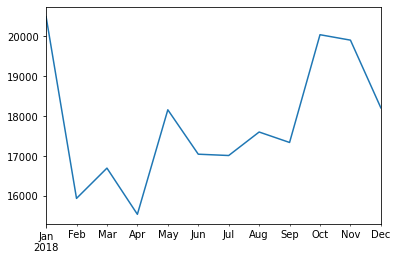

In [22]:
coll_df.resample('M').size().plot()

And how about the relationship between weather and accidents?

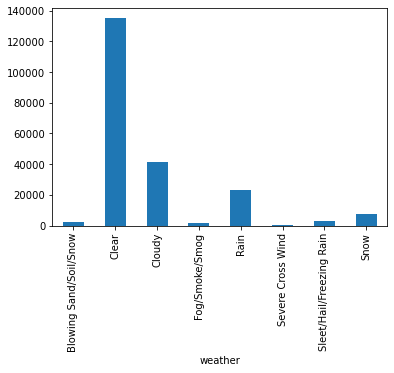

In [23]:
weather_summary = coll_df.groupby('weather').size()
weather_summary.plot.bar();

How could we correct for how often weather appears?

One simple way is to categorize each day by the weather that appears most often in accident reports. This obviously has some issues but it's the best we can probably do using just this data. What could be wise is to import another dataset which has historical weather data.

In [24]:
def get_mode(x):
    return x.mode()

In [25]:
accidents_per_day = coll_df.groupby(coll_df.index.date).agg(
    # Create a new column called weather which gets the modal weather for each day
    weather = ('weather', get_mode),
    # And accidents which is the number of accidents that day
    accidents = ('accident_count', sum))

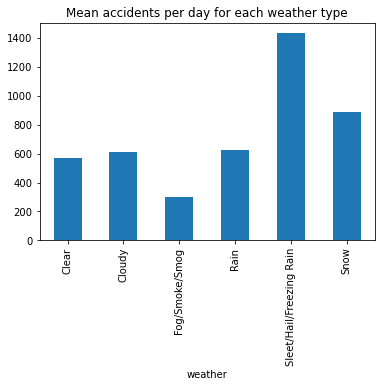

In [26]:
accidents_per_day.groupby('weather').accidents.mean().plot.bar();
plt.title('Mean accidents per day for each weather type');

## Exercises

1. How would you create the above plot in Seaborn instead?

2. Find a question that you'd like to answer with this data or the reddit data. Figure out how to filter/clean/group the data to produce the summary data that will help you to find that answer, and produce a visualization.

## 1. How would you create the above plot in Seaborn instead?

In [27]:
sns.set_style("ticks")
accidents_per_day.head()

,weather,accidents
2018-01-01,Clear,517
2018-01-02,Clear,864
2018-01-03,Clear,699
2018-01-04,Clear,830
2018-01-05,Clear,841


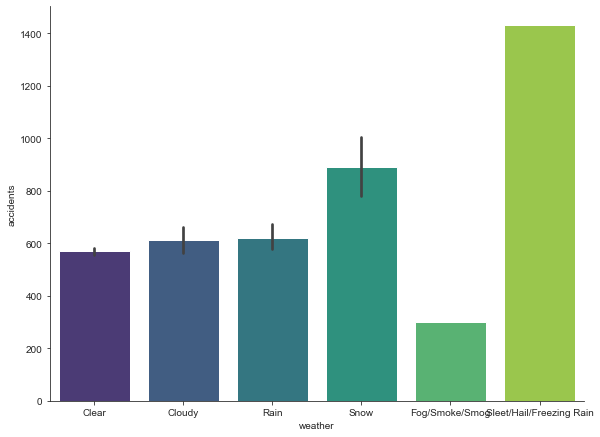

In [28]:
sns.catplot(data=accidents_per_day, kind="bar",
    x="weather", y="accidents", #hue="sex",
    palette="viridis", height=6, aspect=11/8)

## 2. Find a question that you'd like to answer with this data or the reddit data. Figure out how to filter/clean/group the data to produce the summary data that will help you to find that answer, and produce a visualization.

### <font color=blue> Does the type of weather influence type of accidents (i.e., casualties) and predict the number of casualties? </font>
<font color=blue>Answers: 
* With "Clear" as the least severe road condition and "Sleet/Hall/Freezing rain" as the most severe road condition, the proportion of injuries per accident increases though the proportion of deaths per accident remains the same. (Verified by OLS)
* Using OLS, snow and sleet conditions signifincialty impact number of injuries and deaths. For example, for every unit change in snow, there's a 19.6 unit increase in number of injuries/deaths (update: should used standardized values).
</font>

In [29]:
# Create dataframe to sum injured and deceased by date
type_per_day = coll_df.groupby(coll_df.index.date).agg(
    # Create a new column called weather which gets the modal weather for each day
    weather = ('weather', get_mode),
    # And accidents which is the number of accidents that day
    accidents = ('accident_count', sum),
    injured = ('injured', sum),
    deceased = ('deceased', sum))
    #date = ('weather', get_mode),
   #time = ('weather', get_mode))

type_per_day = type_per_day.reset_index()
type_per_day

,index,weather,accidents,injured,deceased
0,2018-01-01,Clear,517,117.0,1.0
1,2018-01-02,Clear,864,128.0,3.0
2,2018-01-03,Clear,699,92.0,2.0
3,2018-01-04,Clear,830,161.0,2.0
4,2018-01-05,Clear,841,127.0,0.0
...,...,...,...,...,...
360,2018-12-27,Rain,568,115.0,0.0
361,2018-12-28,Clear,477,106.0,3.0
362,2018-12-29,Clear,486,92.0,2.0
363,2018-12-30,Clear,291,59.0,1.0


In [30]:
# Reshape wide to long format to get count for injured and deceased separately 

accidenttype = pd.melt(type_per_day, id_vars=['index', 'weather','accidents'], 
                       value_vars=['injured', 'deceased'])

#Create proportion since values are not useful without context/ total accidents
accidenttype["proportion"]= accidenttype["value"] / accidenttype["accidents"]

#accidenttype['variable'].dtypes     dtype = 0??
accidenttype.sort_values("index")

,index,weather,accidents,variable,value,proportion
0,2018-01-01,Clear,517,injured,117.0,0.226306
365,2018-01-01,Clear,517,deceased,1.0,0.001934
366,2018-01-02,Clear,864,deceased,3.0,0.003472
1,2018-01-02,Clear,864,injured,128.0,0.148148
2,2018-01-03,Clear,699,injured,92.0,0.131617
...,...,...,...,...,...,...
362,2018-12-29,Clear,486,injured,92.0,0.189300
728,2018-12-30,Clear,291,deceased,1.0,0.003436
363,2018-12-30,Clear,291,injured,59.0,0.202749
364,2018-12-31,Rain,570,injured,111.0,0.194737


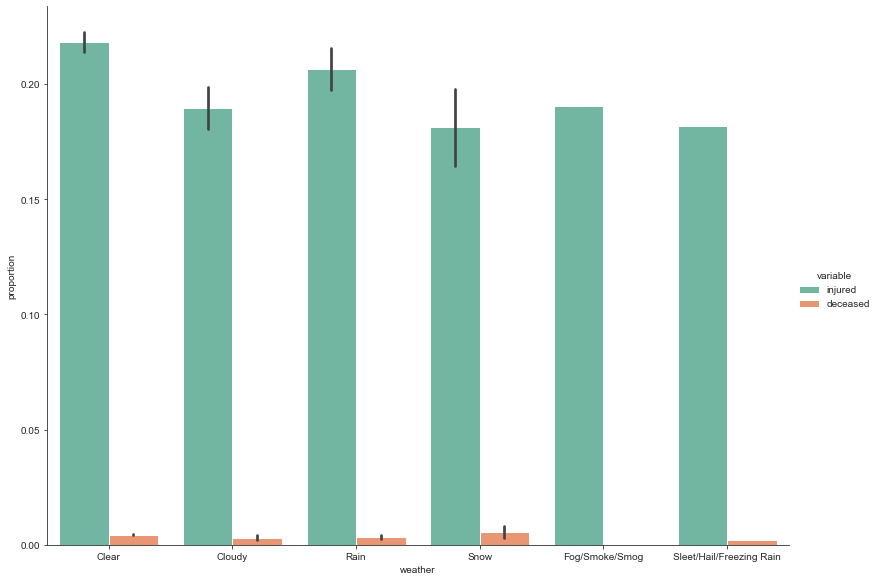

In [31]:
# To create barcharts on casualties
sns.catplot(data=accidenttype, kind="bar",
    x="weather", y="proportion", hue="variable",             #proportion vs value 
    palette="Set2", height=8, aspect=11/8)

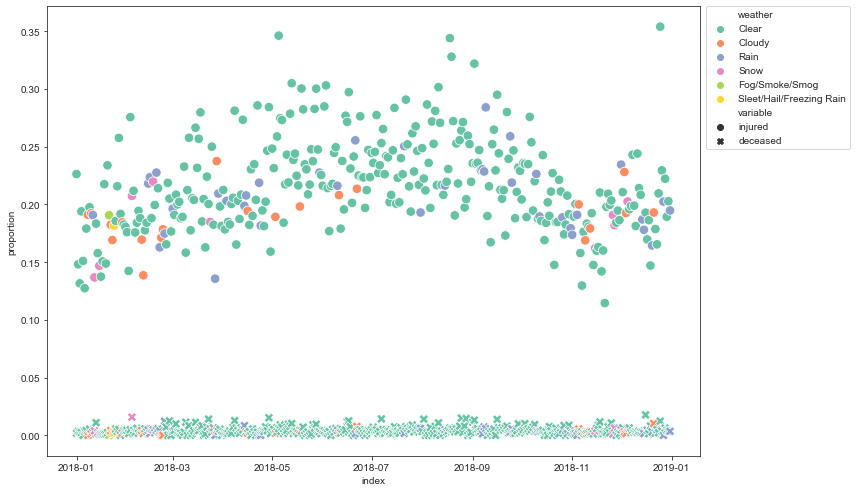

In [32]:
## To create scatterplot by day
accidenttype.index = pd.to_datetime(accidenttype.index)
sns.scatterplot(x="index", y="proportion", 
             # col = "variable", 
                hue = "weather",
                style = "variable",
                palette="Set2",
                s =90,
                data=accidenttype);
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.gcf().set_size_inches(11.7, 8.27)

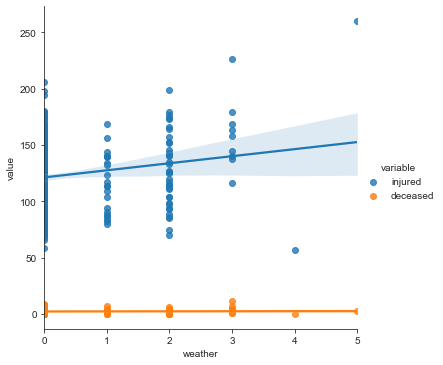

In [41]:
#**Recode to category assuming "Clear" is least severe weather and "Sleet/Hail/Freezing rain" as most severe.

accidenttype['weather'] = accidenttype['weather'].astype('category')
accidenttype['weather'] = accidenttype['weather'].cat.reorder_categories(['Clear', 'Cloudy', 'Rain', 
                                                                          'Snow', 'Fog/Smoke/Smog', 
                                                                          'Sleet/Hail/Freezing Rain'], ordered=True)
accidenttype['weather'] = accidenttype['weather'].cat.codes
accidenttype.sort_values("weather")

sns.lmplot(y="value", x="weather", 
            hue ="variable",
            data=accidenttype)

### OLS

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from statsmodels.formula.api import ols

In [34]:
mod = ols(formula='value ~ weather + variable', data=accidenttype)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1151.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:24:24   Log-Likelihood:                -3210.6
No. Observations:                 730   AIC:                             6435.
Df Residuals:                     723   BIC:                             6467.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [44]:
type_per_day['weather'] = type_per_day['weather'].astype('category')
type_per_day['weather'] = type_per_day['weather'].cat.reorder_categories(['Clear', 'Cloudy', 'Rain', 
                                                                          'Snow', 'Fog/Smoke/Smog', 
                                                                          'Sleet/Hail/Freezing Rain'], ordered=True)
type_per_day['weather'] = type_per_day['weather'].cat.codes
type_per_day.sort_values("weather")

,index,weather,accidents,injured,deceased
0,2018-01-01,0,517,117.0,1.0
231,2018-08-20,0,588,160.0,3.0
230,2018-08-19,0,369,121.0,2.0
229,2018-08-18,0,468,161.0,3.0
228,2018-08-17,0,737,170.0,3.0
...,...,...,...,...,...
34,2018-02-04,3,762,158.0,12.0
82,2018-03-24,3,882,163.0,5.0
338,2018-12-05,3,1116,226.0,7.0
20,2018-01-21,4,299,57.0,0.0


In [45]:
mod = ols(formula='injured ~ weather', data=type_per_day)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                injured   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     11.96
Date:                Mon, 31 May 2021   Prob (F-statistic):           0.000610
Time:                        18:05:13   Log-Likelihood:                -1737.3
No. Observations:                 365   AIC:                             3479.
Df Residuals:                     363   BIC:                             3486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    121.3118      1.619     74.941      0.0

In [48]:
##JP: using a different a method to recreate dataframe

nd = coll_df.groupby([coll_df.weather, coll_df.index.hour, coll_df.index.day_name()]).size().reset_index()
nd = nd.rename(columns={"level_1": "hour", "level_2": "day", 0: "accidents"})
#nd

nd_by_day = coll_df.groupby([coll_df.index.hour, coll_df.index.day_name()]).agg(
    weather = ('weather', get_mode),
    accidents = ('accident_count', sum))

nd_by_day.reset_index()
nd_by_day = nd.rename(columns={"level_0": "hour", "level_1": "day"})

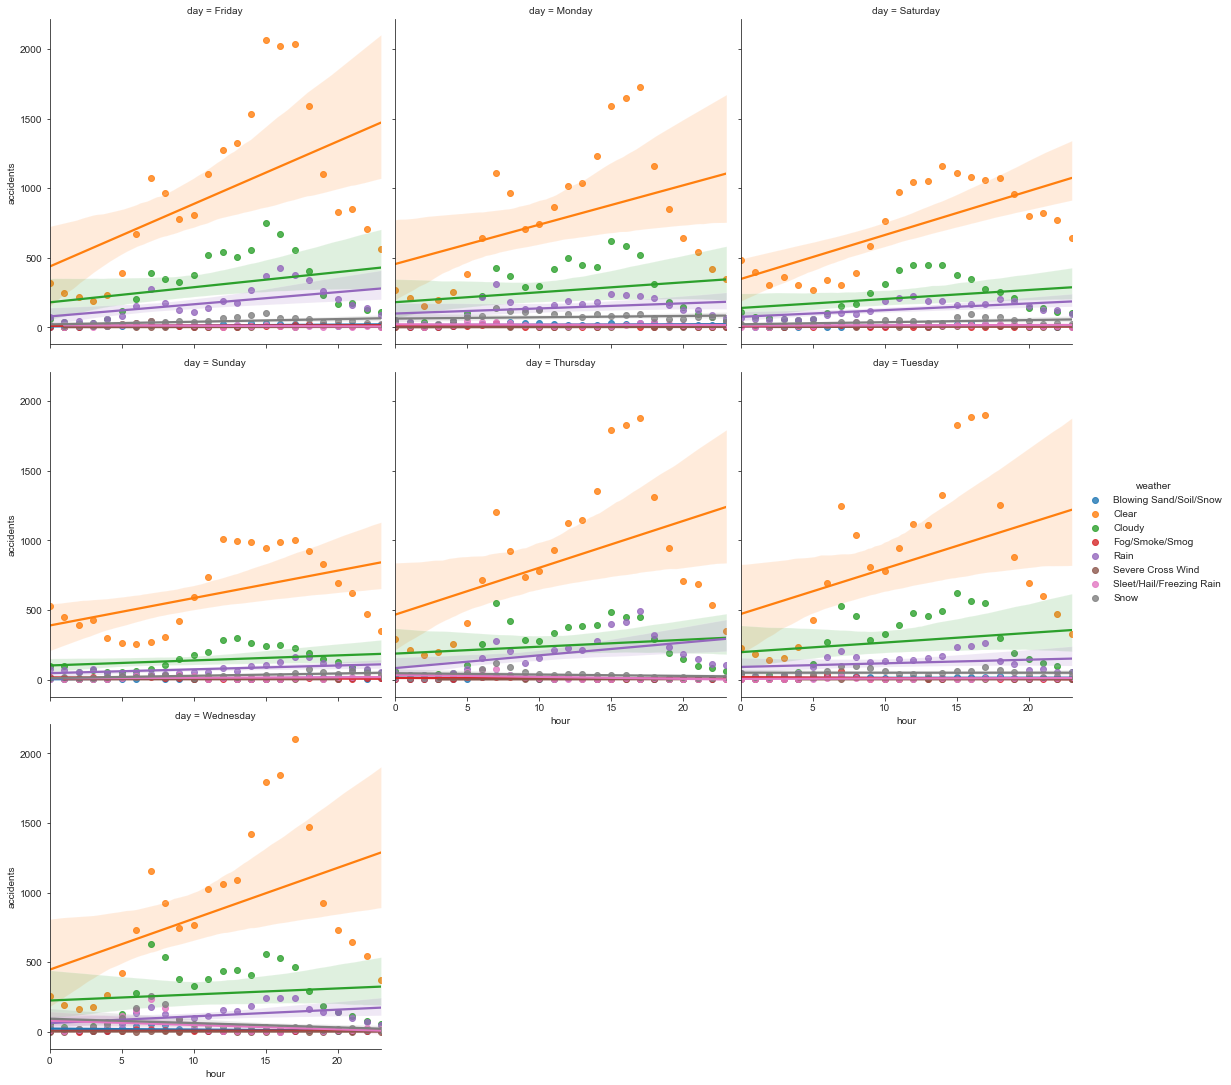

In [49]:
## New plot
sns.lmplot(y="accidents", x="hour",
           col="day", col_wrap=3,
           hue="weather",
           data=nd_by_day)

### Another idea that we were toying around with for our second question

### <font color=blue> If the type of weather is associated with number and type of casualties, does the time of day + weather affect the type of casualties? </font>
<font color=blue>Answers
* It was not ideal to group by hour because it removes the "weather". 
* However, there appear to be 
    * Fewer injuries in accidents during the early morning than the rest of the day. 
    * Deaths per accident appears to be higher between 12AM and 3AM.</font>

In [58]:
df2 = pd.DataFrame({"date" : grouped.COLLDTE.first(),
                    "time": grouped.COLLISION_TIME.first() + grouped.COLLISION_TIME_AM_PM.first(), 
                    "injured": grouped.INJUREDNMB.first(),
                    "deceased": grouped.DEADNMB.first(),
                    "weather": grouped.WEATHERDESCR.first(),
                    "accident_count": 1,
                    "factor": grouped.PRIMARYFACTORDESCR.first() #grabbing the factor to see reasaons why people crash
                   })
df2.index = pd.to_datetime(df2.date + ' ' + df2.time)

In [59]:
df2

,date,time,injured,deceased,weather,accident_count,factor
2018-01-01 00:03:00,2018-01-01,12:03AM,3.0,0.0,Cloudy,1,DISREGARD SIGNAL/REG SIGN
2018-01-01 00:48:00,2018-01-01,12:48AM,0.0,0.0,Snow,1,LEFT OF CENTER
2018-01-01 00:57:00,2018-01-01,12:57AM,0.0,0.0,Clear,1,RAN OFF ROAD
2018-01-01 00:45:00,2018-01-01,12:45AM,0.0,0.0,Snow,1,RAN OFF ROAD
2018-01-01 00:26:00,2018-01-01,12:26AM,0.0,0.0,Snow,1,FAILURE TO YIELD RIGHT OF WAY
...,...,...,...,...,...,...,...
2018-12-26 15:02:00,2018-12-26,03:02PM,0.0,0.0,Clear,1,"OTHER (ENVIRONMENTAL),EXPLAIN IN NARR"
2018-12-27 21:45:00,2018-12-27,09:45PM,0.0,0.0,Cloudy,1,"DRIVER DISTRACTED,EXPLAIN IN NARRATIVE"
2018-12-31 17:57:00,2018-12-31,05:57PM,0.0,0.0,Snow,1,IMPROPER PASSING
2018-12-25 17:46:00,2018-12-25,05:46PM,1.0,0.0,Cloudy,1,RAN OFF ROAD


In [90]:
# Create dataframe to sum injured and deceased by date AND look at the factors/reasons for accidents
# Third thought was the associations between weather and time of accidents

factor_summary = df2.groupby(df2.index.date).agg(
    # Create a new column called weather which gets the modal weather for each day
    weather = ('weather', get_mode),
    factor =('factor', get_mode),
    accidents = ('accident_count', sum),
    injured = ('injured', sum),
    deceased = ('deceased', sum))
    #date = ('weather', get_mode),
   #time = ('weather', get_mode))

factor_summary

,weather,factor,accidents,injured,deceased
2018-01-01,Clear,RAN OFF ROAD,517,117.0,1.0
2018-01-02,Clear,FOLLOWING TOO CLOSELY,864,128.0,3.0
2018-01-03,Clear,FOLLOWING TOO CLOSELY,699,92.0,2.0
2018-01-04,Clear,FOLLOWING TOO CLOSELY,830,161.0,2.0
2018-01-05,Clear,FOLLOWING TOO CLOSELY,841,127.0,0.0
...,...,...,...,...,...
2018-12-27,Rain,FOLLOWING TOO CLOSELY,568,115.0,0.0
2018-12-28,Clear,FAILURE TO YIELD RIGHT OF WAY,477,106.0,3.0
2018-12-29,Clear,SPEED TOO FAST FOR WEATHER CONDITIONS,486,92.0,2.0
2018-12-30,Clear,FAILURE TO YIELD RIGHT OF WAY,291,59.0,1.0


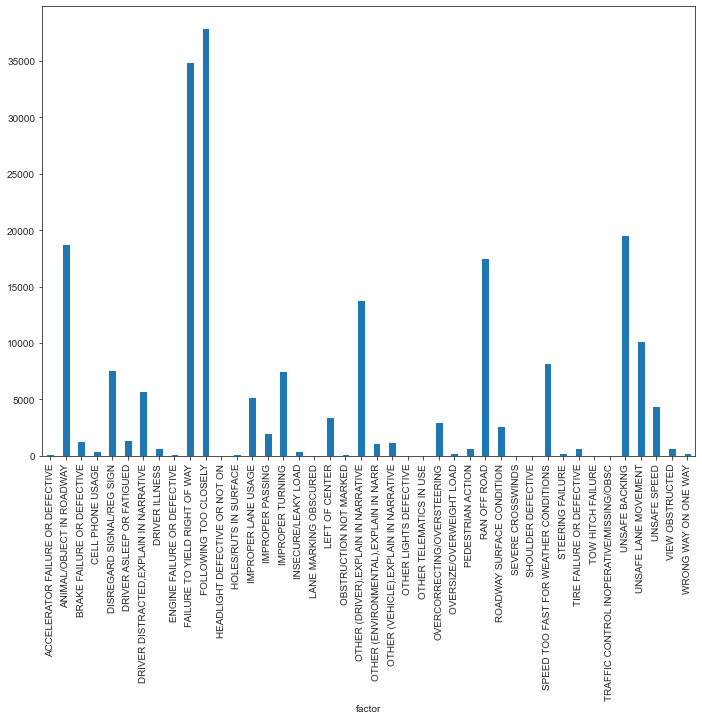

In [93]:
# To create barcharts on factor
test = df2.groupby('factor').size()
test.plot.bar()
plt.gcf().set_size_inches(11.7, 8.27)

In [71]:
## Tried using resample by hour but that didn't work out as well. Need to "sum" every day. 

hourlydata = df2.resample('H').sum().reset_index()
hourlydata

,index,injured,deceased,accident_count
0,2018-01-01 00:00:00,6.0,0.0,29
1,2018-01-01 01:00:00,2.0,0.0,16
2,2018-01-01 02:00:00,7.0,0.0,23
3,2018-01-01 03:00:00,9.0,0.0,21
4,2018-01-01 04:00:00,2.0,0.0,15
...,...,...,...,...
8755,2018-12-31 19:00:00,8.0,0.0,42
8756,2018-12-31 20:00:00,4.0,0.0,23
8757,2018-12-31 21:00:00,5.0,0.0,29
8758,2018-12-31 22:00:00,0.0,0.0,15


In [61]:
## SEPARATELY
## Better option simply to group by time and then divide by 60 minutes
# Unfortunately that removes all the types of weather, likely because yesteday at 12am it may be snowing but 
# it is clear at 2am the day before.

type_per_hour = df2.groupby(df2.index.time).agg(
    # Create a new column called weather which gets the modal weather for each day
    weather = ('weather', get_mode),
    # And accidents which is the number of accidents that day
    accidents = ('accident_count', sum),
    injured = ('injured', sum),
    deceased = ('deceased', sum)).reset_index()
type_per_hour

N = 60
hourly = type_per_hour.groupby(type_per_hour.index // N).sum().reset_index()
##removes the type of weather because it changes by hour. 

hourly.head()

,index,accidents,injured,deceased
0,0,3620,812.0,21.0
1,1,2757,565.0,28.0
2,2,2281,493.0,28.0
3,3,2559,554.0,35.0
4,4,2972,574.0,29.0


In [48]:
hourlymelt = pd.melt(hourly, id_vars=['index', 'accidents'], 
                       value_vars=['injured', 'deceased'])
#Create proportion since values are not useful without context/ total accidents
hourlymelt["proportion"]= hourlymelt["value"] / hourlymelt["accidents"]
hourlymelt.head()

,index,accidents,variable,value,proportion
0,0,3620,injured,812.0,0.224309
1,1,2757,injured,565.0,0.204933
2,2,2281,injured,493.0,0.216133
3,3,2559,injured,554.0,0.216491
4,4,2972,injured,574.0,0.193136


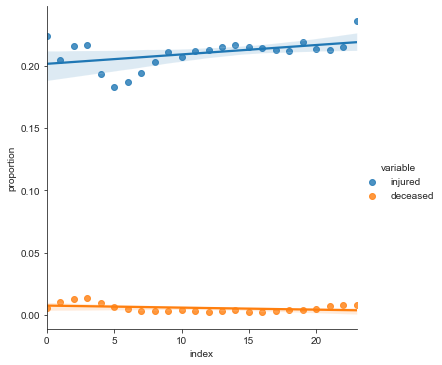

In [62]:
sns.lmplot(x="index", y="proportion", #where index is time of day
            hue ="variable",
            data=hourlymelt)